In [1]:
# importing the packages

import pandas as pd
import math
import os

In [2]:
# Download URL where the dataset can be found in csv format

url = 'https://cricsheet.org/downloads/t20s_male_csv2.zip'

In [3]:
# the desired directory where the data will be stored
folder_name = url.split('/')[-1].split('.zip')[0]

In [4]:
# separate the zip file

zip_file = url.split('/')[-1]

Downloading the data

In [5]:
# fetch the zip file from the given URL

!wget -q "$url"

In [6]:
# create a directory with a folder name

!mkdir -p "$folder_name"

In [7]:
# unzip the files and store in the folder

!unzip -o -qq "$zip_file" -d "$folder_name"

In [8]:
# remove the zip file from the folder - decluttering

!rm "$zip_file"

Creating a dataframe

In [9]:
# clean the readme file

readme = pd.read_csv(os.path.join(folder_name, 'README.txt'), sep='/n', names = ['matches'])

readme

<ipython-input-9-f36bb3f3d84b>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  readme = pd.read_csv(os.path.join(folder_name, 'README.txt'), sep='/n', names = ['matches'])


,matches
0,All Men's T20 International match data in CSV ...
1,==============================================...
2,The background
3,--------------
4,"As an experiment, after being asked by a user ..."
...,...
1971,-------------------
1972,You can find all of our currently available da...
1973,You can contact me via the following methods:
1974,Email : stephen@cricsheet.org


In [10]:
cdf = readme['matches'].str.split('-').apply(pd.Series, 1).iloc[:, :8].dropna()

cdf

,0,1,2,3,4,5,6,7
3,,,,,,,,
16,,,,,,,,
35,,,,,,,,
47,,,,,,,,
55,,,,,,,,
...,...,...,...,...,...,...,...,...
1966,2006,01,09,international,T20,male,226374,Australia vs South Africa
1967,2005,10,21,international,T20,male,222678,South Africa vs New Zealand
1968,2005,06,13,international,T20,male,211028,England vs Australia
1969,2005,02,17,international,T20,male,211048,New Zealand vs Australia


In [11]:
df = cdf.loc[cdf[0] != '']
df

,0,1,2,3,4,5,6,7
98,2023,07,24,international,T20,male,1383077,Scotland vs Italy
99,2023,07,24,international,T20,male,1383078,Austria vs Denmark
100,2023,07,24,international,T20,male,1383079,Jersey vs Ireland
101,2023,07,23,international,T20,male,1383074,Ireland vs Austria
102,2023,07,23,international,T20,male,1383075,Italy vs Jersey
...,...,...,...,...,...,...,...,...
1965,2006,02,16,international,T20,male,237242,New Zealand vs West Indies
1966,2006,01,09,international,T20,male,226374,Australia vs South Africa
1967,2005,10,21,international,T20,male,222678,South Africa vs New Zealand
1968,2005,06,13,international,T20,male,211028,England vs Australia


In [12]:
# reset index

df.reset_index(drop = True, inplace = True)

# rename the columns

df.columns = ['Year', 'Month', 'Day', 'International', 'Format', 'Gender', 'Cricsheet_id', 'Cricsheet_name']
df

,Year,Month,Day,International,Format,Gender,Cricsheet_id,Cricsheet_name
0,2023,07,24,international,T20,male,1383077,Scotland vs Italy
1,2023,07,24,international,T20,male,1383078,Austria vs Denmark
2,2023,07,24,international,T20,male,1383079,Jersey vs Ireland
3,2023,07,23,international,T20,male,1383074,Ireland vs Austria
4,2023,07,23,international,T20,male,1383075,Italy vs Jersey
...,...,...,...,...,...,...,...,...
1867,2006,02,16,international,T20,male,237242,New Zealand vs West Indies
1868,2006,01,09,international,T20,male,226374,Australia vs South Africa
1869,2005,10,21,international,T20,male,222678,South Africa vs New Zealand
1870,2005,06,13,international,T20,male,211028,England vs Australia


In [13]:
df.dtypes

Year              object
Month             object
Day               object
International     object
Format            object
Gender            object
Cricsheet_id      object
Cricsheet_name    object
dtype: object

In [14]:
df['date'] = df.apply(lambda x: pd.to_datetime(x['Year'] + '-' + x['Month'] + '-' + x['Day']), axis = 1)

df.drop(columns = ['Year', 'Month', 'Day'], inplace = True)

df['Cricsheet_id'] = df['Cricsheet_id'].astype('str')

df['date'] = pd.to_datetime(df['date'])

<ipython-input-14-25ea96cd6a3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.apply(lambda x: pd.to_datetime(x['Year'] + '-' + x['Month'] + '-' + x['Day']), axis = 1)
<ipython-input-14-25ea96cd6a3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Year', 'Month', 'Day'], inplace = True)
<ipython-input-14-25ea96cd6a3c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [15]:
df

,International,Format,Gender,Cricsheet_id,Cricsheet_name,date
0,international,T20,male,1383077,Scotland vs Italy,2023-07-24
1,international,T20,male,1383078,Austria vs Denmark,2023-07-24
2,international,T20,male,1383079,Jersey vs Ireland,2023-07-24
3,international,T20,male,1383074,Ireland vs Austria,2023-07-23
4,international,T20,male,1383075,Italy vs Jersey,2023-07-23
...,...,...,...,...,...,...
1867,international,T20,male,237242,New Zealand vs West Indies,2006-02-16
1868,international,T20,male,226374,Australia vs South Africa,2006-01-09
1869,international,T20,male,222678,South Africa vs New Zealand,2005-10-21
1870,international,T20,male,211028,England vs Australia,2005-06-13


In [16]:
class CricketDataProcessor:
    def __init__(self, cricsheet_path):
        self.cricsheet_path = cricsheet_path

    def process_df(self):
        cricsheet_readme = pd.read_csv(os.path.join(self.cricsheet_path, 'README.txt'), sep='/n', names=['matches'])

        cdf = cricsheet_readme['matches'].str.split('-').apply(pd.Series, 1)

        cdf = cdf.iloc[:, :8].dropna()

        df = cdf.loc[cdf[0] != '']

        df.reset_index(drop=True, inplace=True)

        df.columns = ['Year', 'Month', 'Day', 'Int', 'Format', 'Gender', 'Cricsheet_id', 'Cricsheet_name']

        df['date'] = df.apply(lambda x: pd.to_datetime(x['Year'] + '-' + x['Month'] + '-' + x['Day']), axis=1)

        df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

        df['Cricsheet_id'] = df['Cricsheet_id'].astype('str')

        df['date'] = pd.to_datetime(df['date'])

        return df


In [17]:
processor = CricketDataProcessor('/content/t20s_male_csv2')
df = processor.process_df()

<ipython-input-16-66907b7aff5d>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cricsheet_readme = pd.read_csv(os.path.join(self.cricsheet_path, 'README.txt'), sep='/n', names=['matches'])
<ipython-input-16-66907b7aff5d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.apply(lambda x: pd.to_datetime(x['Year'] + '-' + x['Month'] + '-' + x['Day']), axis=1)
<ipython-input-16-66907b7aff5d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [18]:
df.to_csv('all_t20s.csv', index=False)

df

,Int,Format,Gender,Cricsheet_id,Cricsheet_name,date
0,international,T20,male,1383077,Scotland vs Italy,2023-07-24
1,international,T20,male,1383078,Austria vs Denmark,2023-07-24
2,international,T20,male,1383079,Jersey vs Ireland,2023-07-24
3,international,T20,male,1383074,Ireland vs Austria,2023-07-23
4,international,T20,male,1383075,Italy vs Jersey,2023-07-23
...,...,...,...,...,...,...
1867,international,T20,male,237242,New Zealand vs West Indies,2006-02-16
1868,international,T20,male,226374,Australia vs South Africa,2006-01-09
1869,international,T20,male,222678,South Africa vs New Zealand,2005-10-21
1870,international,T20,male,211028,England vs Australia,2005-06-13


# FINDING OUT SOME STATS

In [19]:
url = 'https://stats.espncricinfo.com/ci/engine/team/25.html?class=3;template=results;type=team;view=results'

In [20]:
dfs = pd.read_html(url)

In [21]:
# Extract the second dataframe which contains the match results
match_results_df = dfs[3]

# Print the match results dataframe
print(match_results_df)

    Result     Margin    BR  Toss  Bat  Unnamed: 5      Opposition  \
0      won    43 runs   NaN  lost  1st         NaN      v Zimbabwe   
1      won  5 wickets  14.0   won  2nd         NaN         v Kenya   
2     lost    30 runs   NaN   won  2nd         NaN      v Pakistan   
3      won  6 wickets  12.0   won  2nd         NaN   v West Indies   
4     lost  7 wickets   7.0  lost  1st         NaN  v South Africa   
..     ...        ...   ...   ...  ...         ...             ...   
153    won    22 runs   NaN  lost  1st         NaN       v Ireland   
154    won    77 runs   NaN  lost  1st         NaN       v Ireland   
155   lost  7 wickets  36.0   won  1st         NaN       v Ireland   
156    won  2 wickets   1.0   won  2nd         NaN   v Afghanistan   
157    won  6 wickets   5.0   won  2nd         NaN   v Afghanistan   

            Ground   Start Date   Unnamed: 9  
0           Khulna  28 Nov 2006     T20I # 9  
1    Nairobi (Gym)   1 Sep 2007    T20I # 17  
2    Nairobi (Gym)

In [22]:
match_results_df.columns

Index(['Result', 'Margin', 'BR', 'Toss', 'Bat', 'Unnamed: 5', 'Opposition',
       'Ground', 'Start Date', 'Unnamed: 9'],
      dtype='object')

In [23]:
match_results_df.drop(columns=['BR', 'Unnamed: 5', 'Unnamed: 9'], inplace=True)

In [24]:
match_results_df

,Result,Margin,Toss,Bat,Opposition,Ground,Start Date
0,won,43 runs,lost,1st,v Zimbabwe,Khulna,28 Nov 2006
1,won,5 wickets,won,2nd,v Kenya,Nairobi (Gym),1 Sep 2007
2,lost,30 runs,won,2nd,v Pakistan,Nairobi (Gym),2 Sep 2007
3,won,6 wickets,won,2nd,v West Indies,Johannesburg,13 Sep 2007
4,lost,7 wickets,lost,1st,v South Africa,Cape Town,15 Sep 2007
...,...,...,...,...,...,...,...
153,won,22 runs,lost,1st,v Ireland,Chattogram,27 Mar 2023
154,won,77 runs,lost,1st,v Ireland,Chattogram,29 Mar 2023
155,lost,7 wickets,won,1st,v Ireland,Chattogram,31 Mar 2023
156,won,2 wickets,won,2nd,v Afghanistan,Sylhet,14 Jul 2023


In [25]:
team_df = match_results_df.copy()

In [26]:
# ##Initialize the Cricsheet Team name here
team = "Bangladesh" #@param {type:"string"}

In [27]:
# ##Cricsheet player roles are of three types, "striker" or "bowler" or "non_striker". Here I have not taken the non striker into consideration
playing_situation = "bowling_team" #@param ["bowling_team", "batting_team"]

In [28]:
##Merge using national team
team_df['Start Date'] = pd.to_datetime(match_results_df['Start Date'])
team_df=team_df.merge(df.loc[df['Cricsheet_name'].str.contains("Bangladesh"),['Cricsheet_id','Cricsheet_name','date']],left_on='Start Date',right_on='date',how='left')

In [29]:
# # drop the repeated columns
# team_df.drop(['Cricsheet_id_y', 'Cricsheet_name_y', 'date_y'], axis=1, inplace=True)

# # rename the column names
# team_df = team_df.rename(columns={'Cricsheet_id_x': 'Cricsheet_id', 'Cricsheet_name_x': 'Cricsheet_id', 'date_x': 'date'})


In [30]:
# print the updated dataframe
team_df

,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Cricsheet_id,Cricsheet_name,date
0,won,43 runs,lost,1st,v Zimbabwe,Khulna,2006-11-28,NaN,NaN,NaT
1,won,5 wickets,won,2nd,v Kenya,Nairobi (Gym),2007-09-01,306987,Kenya vs Bangladesh,2007-09-01
2,lost,30 runs,won,2nd,v Pakistan,Nairobi (Gym),2007-09-02,306989,Bangladesh vs Pakistan,2007-09-02
3,won,6 wickets,won,2nd,v West Indies,Johannesburg,2007-09-13,287857,Bangladesh vs West Indies,2007-09-13
4,lost,7 wickets,lost,1st,v South Africa,Cape Town,2007-09-15,287864,South Africa vs Bangladesh,2007-09-15
...,...,...,...,...,...,...,...,...,...,...
153,won,22 runs,lost,1st,v Ireland,Chattogram,2023-03-27,1355720,Bangladesh vs Ireland,2023-03-27
154,won,77 runs,lost,1st,v Ireland,Chattogram,2023-03-29,1355721,Bangladesh vs Ireland,2023-03-29
155,lost,7 wickets,won,1st,v Ireland,Chattogram,2023-03-31,1355722,Bangladesh vs Ireland,2023-03-31
156,won,2 wickets,won,2nd,v Afghanistan,Sylhet,2023-07-14,1377015,Afghanistan vs Bangladesh,2023-07-14


In [31]:
# count the number of NaNs in the dataframe
num_nans = team_df.isna().sum().sum()
print("Number of NaNs in the dataframe:", num_nans)

# print all NaNs in the dataframe
print(team_df[team_df.isna().any(axis=1)])

Number of NaNs in the dataframe: 30
    Result     Margin  Toss  Bat     Opposition      Ground Start Date  \
0      won    43 runs  lost  1st     v Zimbabwe      Khulna 2006-11-28   
19     won     1 runs   won  1st      v Ireland     Belfast 2012-07-20   
20     won  2 wickets  lost  2nd      v Ireland     Belfast 2012-07-21   
21    lost    34 runs  lost  2nd     v Scotland   The Hague 2012-07-24   
89    aban          -     -    -  v Afghanistan      Mirpur 2019-09-24   
95    aban          -     -    -     v Pakistan      Lahore 2020-01-27   
98    canc          -     -    -      v Ireland    The Oval 2020-05-22   
99    canc          -     -    -      v Ireland  Chelmsford 2020-05-24   
100   canc          -     -    -      v Ireland     Bristol 2020-05-27   
101   canc          -     -    -      v Ireland  Birmingham 2020-05-29   

    Cricsheet_id Cricsheet_name date  
0            NaN            NaN  NaT  
19           NaN            NaN  NaT  
20           NaN            NaN 

In [32]:
team_df

,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Cricsheet_id,Cricsheet_name,date
0,won,43 runs,lost,1st,v Zimbabwe,Khulna,2006-11-28,NaN,NaN,NaT
1,won,5 wickets,won,2nd,v Kenya,Nairobi (Gym),2007-09-01,306987,Kenya vs Bangladesh,2007-09-01
2,lost,30 runs,won,2nd,v Pakistan,Nairobi (Gym),2007-09-02,306989,Bangladesh vs Pakistan,2007-09-02
3,won,6 wickets,won,2nd,v West Indies,Johannesburg,2007-09-13,287857,Bangladesh vs West Indies,2007-09-13
4,lost,7 wickets,lost,1st,v South Africa,Cape Town,2007-09-15,287864,South Africa vs Bangladesh,2007-09-15
...,...,...,...,...,...,...,...,...,...,...
153,won,22 runs,lost,1st,v Ireland,Chattogram,2023-03-27,1355720,Bangladesh vs Ireland,2023-03-27
154,won,77 runs,lost,1st,v Ireland,Chattogram,2023-03-29,1355721,Bangladesh vs Ireland,2023-03-29
155,lost,7 wickets,won,1st,v Ireland,Chattogram,2023-03-31,1355722,Bangladesh vs Ireland,2023-03-31
156,won,2 wickets,won,2nd,v Afghanistan,Sylhet,2023-07-14,1377015,Afghanistan vs Bangladesh,2023-07-14


In [33]:
# ball_by_ball_df=pd.DataFrame()
# for cric_id in team_df['Cricsheet_id']:
#     df= pd.read_csv("{0}/{1}.csv".format(folder_name,str(cric_id).strip()))
#     df= df.loc[df['striker']== team]
#     df['match_id']= df['batting_team'].astype('str')

#     ball_by_ball_df=pd.concat([ball_by_ball_df, df])

# ##Change over to float
# ball_by_ball_df['ball']=ball_by_ball_df['ball'].astype('float')

# ##Get over number
# ball_by_ball_df['over_number']=ball_by_ball_df['ball'].apply(lambda x:int(math.ceil(x)))

ball_by_ball_df=pd.DataFrame()
for i, cric_id in enumerate(team_df['Cricsheet_id']):
    try:
        df= pd.read_csv("{0}/{1}.csv".format(folder_name,str(cric_id).strip()))
        df= df.loc[df['batting_team']== team]
        df['match_id']= df['batting_team'].astype('str')
        df['row_index'] = i
        ball_by_ball_df=pd.concat([ball_by_ball_df, df])

    except FileNotFoundError:
        print(f"File not found for Cricsheet ID {cric_id}")


##Change over to float
ball_by_ball_df['ball']=ball_by_ball_df['ball'].astype('float')

##Get over number
ball_by_ball_df['over_number']=ball_by_ball_df['ball'].apply(lambda x:int(math.ceil(x)))

File not found for Cricsheet ID nan


<ipython-input-33-8d3825609f0e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_id']= df['batting_team'].astype('str')
<ipython-input-33-8d3825609f0e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['row_index'] = i


File not found for Cricsheet ID nan
File not found for Cricsheet ID nan
File not found for Cricsheet ID nan


<ipython-input-33-8d3825609f0e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_id']= df['batting_team'].astype('str')
<ipython-input-33-8d3825609f0e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['row_index'] = i


File not found for Cricsheet ID nan
File not found for Cricsheet ID nan
File not found for Cricsheet ID nan
File not found for Cricsheet ID nan
File not found for Cricsheet ID nan
File not found for Cricsheet ID nan


<ipython-input-33-8d3825609f0e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_id']= df['batting_team'].astype('str')
<ipython-input-33-8d3825609f0e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['row_index'] = i


In [34]:
ball_by_ball_df.drop(['wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed'], axis=1, inplace=True)

In [35]:
ball_by_ball_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,row_index,over_number
125,Bangladesh,2007/08,2007-09-01,Gymkhana Club Ground,2,0.1,Bangladesh,Kenya,Tamim Iqbal,Nazimuddin,TM Odoyo,0,0,1,1
126,Bangladesh,2007/08,2007-09-01,Gymkhana Club Ground,2,0.2,Bangladesh,Kenya,Tamim Iqbal,Nazimuddin,TM Odoyo,1,0,1,1
127,Bangladesh,2007/08,2007-09-01,Gymkhana Club Ground,2,0.3,Bangladesh,Kenya,Nazimuddin,Tamim Iqbal,TM Odoyo,0,0,1,1
128,Bangladesh,2007/08,2007-09-01,Gymkhana Club Ground,2,0.4,Bangladesh,Kenya,Nazimuddin,Tamim Iqbal,TM Odoyo,0,0,1,1
129,Bangladesh,2007/08,2007-09-01,Gymkhana Club Ground,2,0.5,Bangladesh,Kenya,Nazimuddin,Tamim Iqbal,TM Odoyo,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Bangladesh,2023,2023-07-16,Sylhet International Cricket Stadium,2,15.4,Bangladesh,Afghanistan,Shakib Al Hasan,Shamim Hossain,Fazalhaq Farooqi,0,0,157,16
207,Bangladesh,2023,2023-07-16,Sylhet International Cricket Stadium,2,15.5,Bangladesh,Afghanistan,Shakib Al Hasan,Shamim Hossain,Fazalhaq Farooqi,1,0,157,16
208,Bangladesh,2023,2023-07-16,Sylhet International Cricket Stadium,2,15.6,Bangladesh,Afghanistan,Shamim Hossain,Shakib Al Hasan,Fazalhaq Farooqi,1,0,157,16
209,Bangladesh,2023,2023-07-16,Sylhet International Cricket Stadium,2,15.7,Bangladesh,Afghanistan,Shakib Al Hasan,Shamim Hossain,Fazalhaq Farooqi,2,0,157,16


In [36]:
ball_by_ball_df.to_csv('all_new_t20s.csv', index=False)

In [37]:
class MatchData:
    def __init__(self, data):
        self.data = data

    def filter_data(self, batting_team, start_over, end_over):
        filtered_data = self.data[(self.data['batting_team'] == batting_team) &
                                  (self.data['over_number'] >= start_over) &
                                  (self.data['over_number'] <= end_over)]
        return filtered_data

    def group_by_date(self, batting_team, start_over, end_over):
        filtered_data = self.filter_data(batting_team, start_over, end_over)
        grouped_data = filtered_data.groupby(['start_date', 'bowling_team']).agg({'runs_off_bat': 'sum', 'ball': 'count'})
        grouped_data.columns = ['total_runs', 'total_balls']
        grouped_data['strike_rate'] = (grouped_data['total_runs'] / grouped_data['total_balls']) * 100
        grouped_data = grouped_data.reset_index()
        return pd.DataFrame(grouped_data)

    def plot_bowling_strike_rate(self, batting_team, start_over, end_over):
        grouped_data = self.group_by_date(batting_team, start_over, end_over)
        sns.set_style("whitegrid")
        plt.figure(figsize=(10, 6))
        plot = sns.barplot(x='bowling_team', y='strike_rate', data=grouped_data)
        plot.set_title(f"{batting_team}'s Strike Rate by Bowling Team", fontsize=20)
        plot.set_xlabel("Bowling Team", fontsize=16)
        plot.set_ylabel("Strike Rate", fontsize=16)
        plt.show()

# Example usage
match_obj = MatchData(ball_by_ball_df)
grouped_data = match_obj.group_by_date('Bangladesh', 17, 20)
print(grouped_data.head())

   start_date  bowling_team  total_runs  total_balls  strike_rate
0  2007-09-01         Kenya           9           12    75.000000
1  2007-09-02      Pakistan          25           24   104.166667
2  2007-09-13   West Indies           8           12    66.666667
3  2007-09-15  South Africa          20           21    95.238095
4  2007-09-16     Australia          17           26    65.384615


In [38]:
grouped_data

,start_date,bowling_team,total_runs,total_balls,strike_rate
0,2007-09-01,Kenya,9,12,75.000000
1,2007-09-02,Pakistan,25,24,104.166667
2,2007-09-13,West Indies,8,12,66.666667
3,2007-09-15,South Africa,20,21,95.238095
4,2007-09-16,Australia,17,26,65.384615
...,...,...,...,...,...
127,2023-03-27,Ireland,34,21,161.904762
128,2023-03-29,Ireland,12,7,171.428571
129,2023-03-31,Ireland,23,20,115.000000
130,2023-07-14,Afghanistan,36,24,150.000000


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [39]:
grouped_data.to_csv('bd_17_20.csv', index=False)

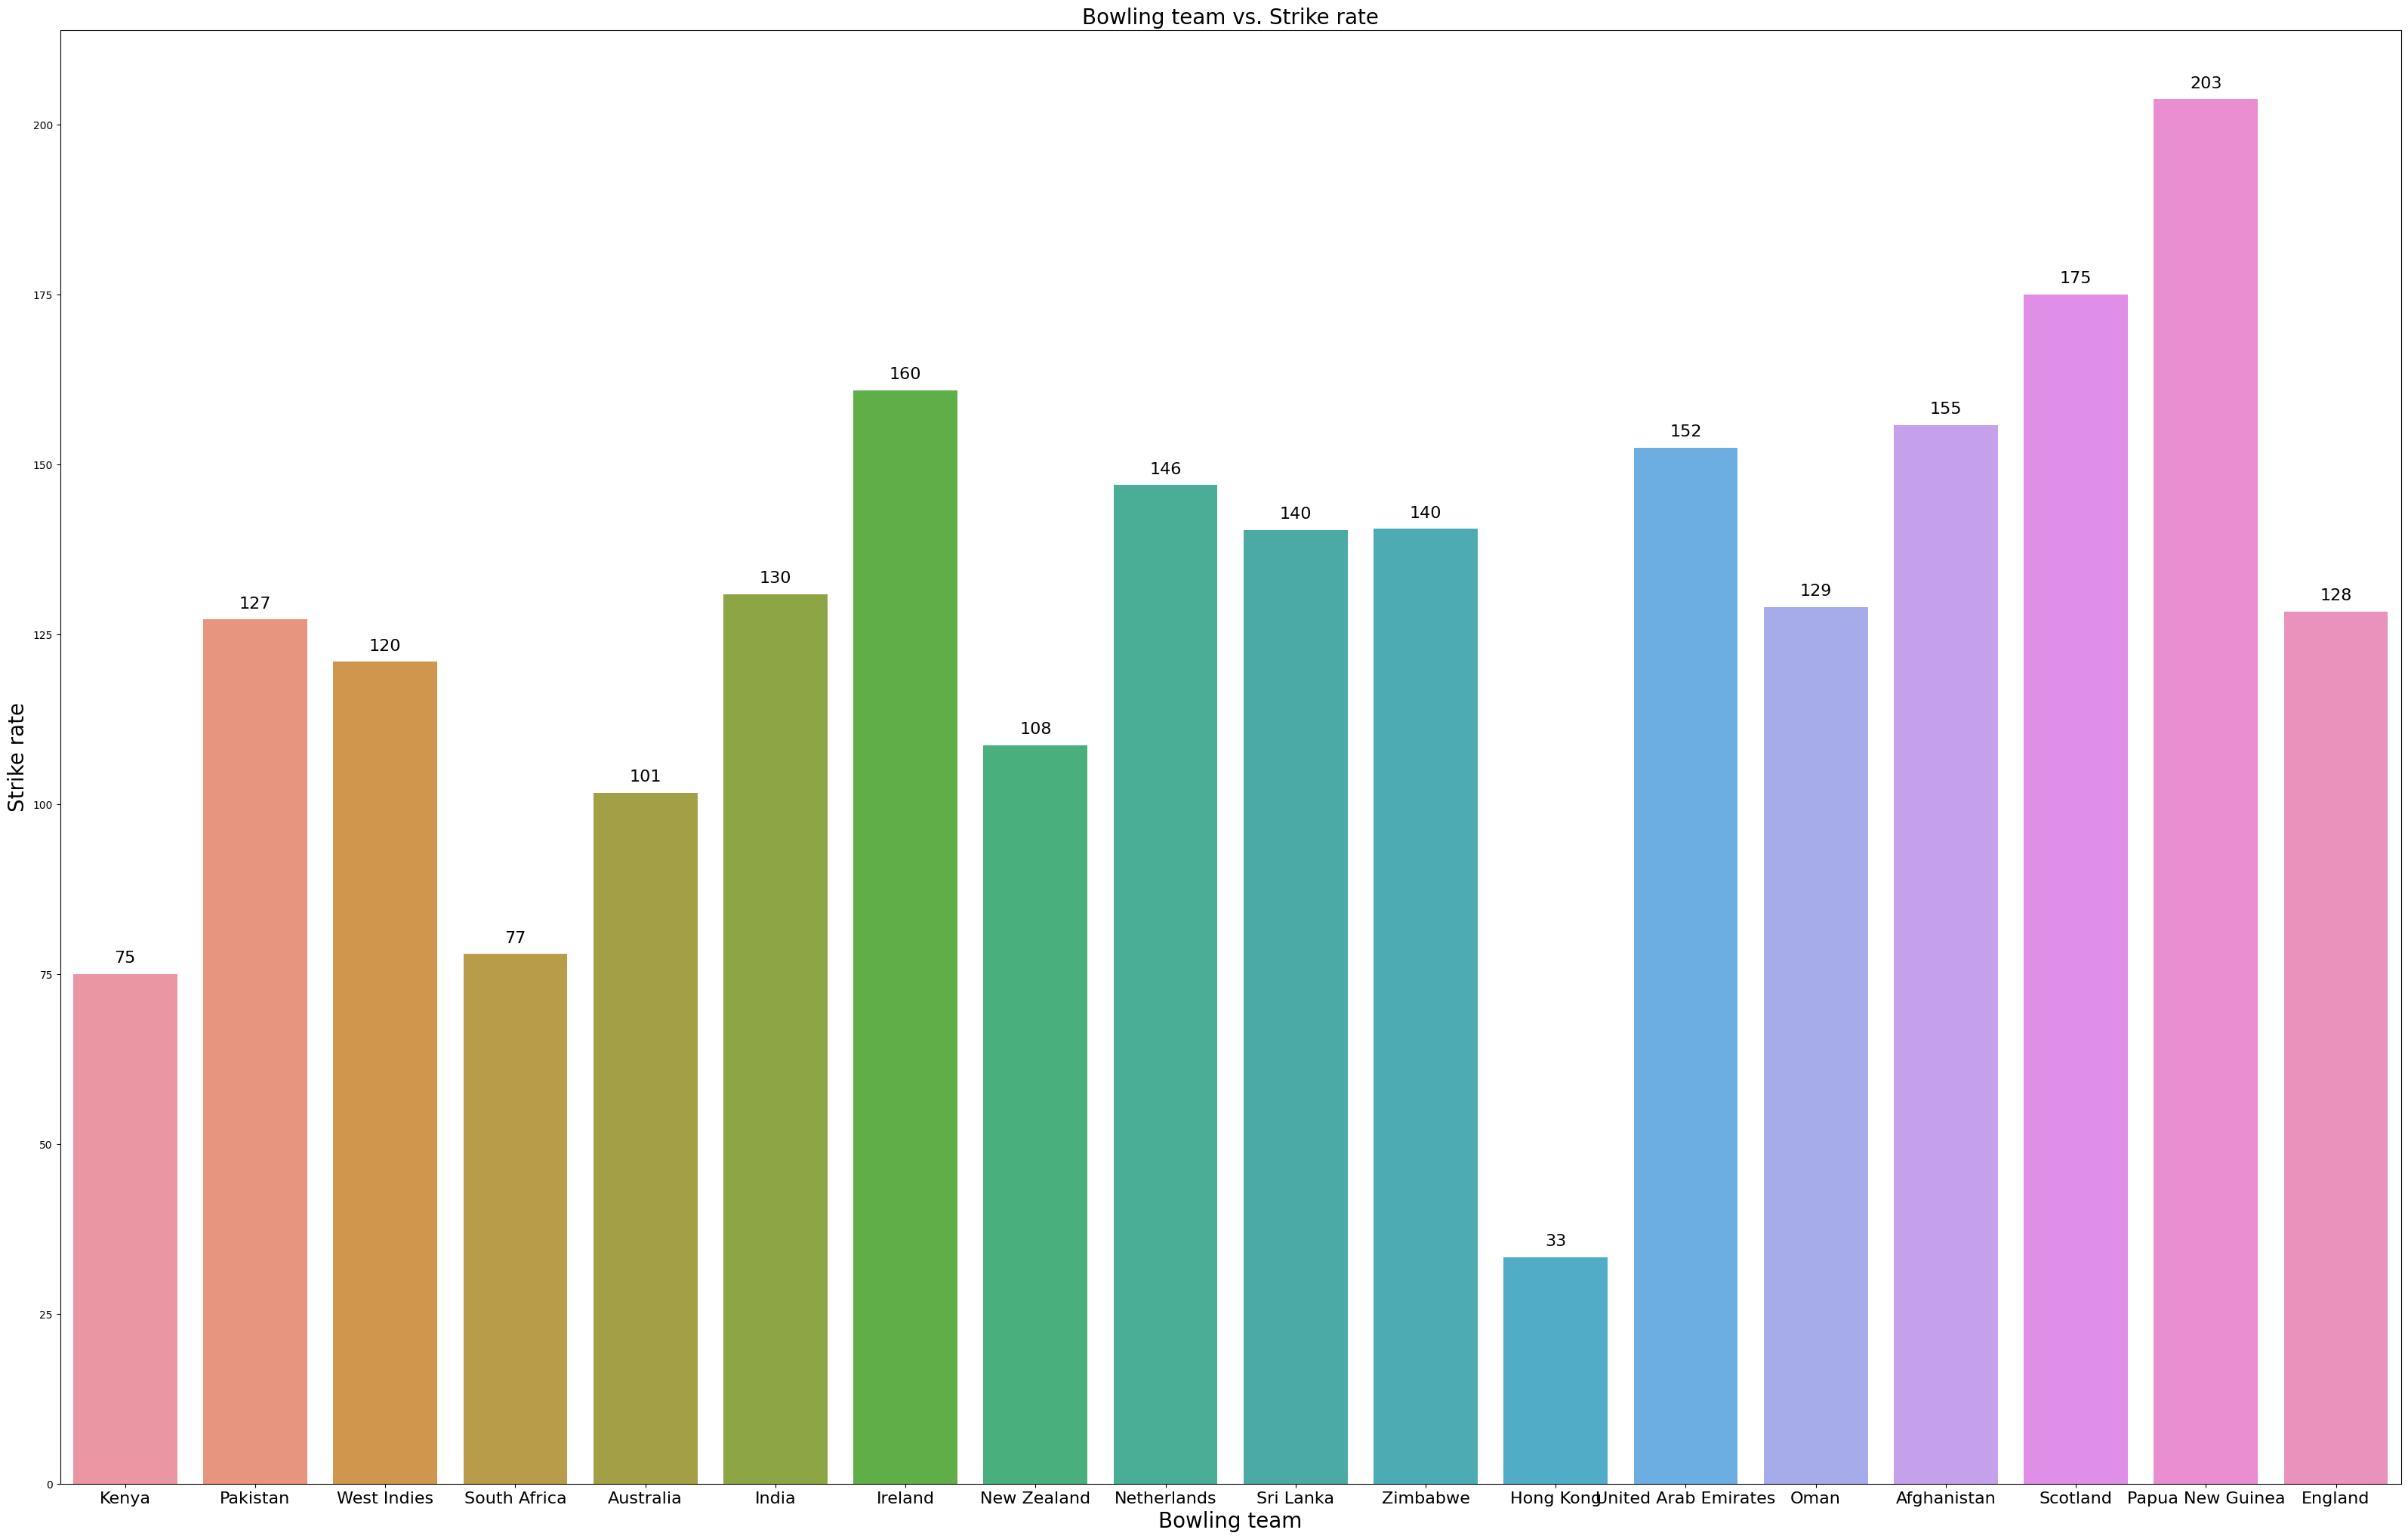

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size
plt.figure(figsize=(40, 25))

ax = sns.barplot(x='bowling_team', y='strike_rate', data=grouped_data, errorbar=None)

plt.title('Bowling team vs. Strike rate', fontsize=20)
plt.xlabel('Bowling team', fontsize=20)
plt.ylabel('Strike rate', fontsize=20)

# Increase font size of xticks
ax.tick_params(axis='x', labelsize=16)

# Add labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=16, padding=8, labels=[f"{int(j.get_height())}" for j in i])

plt.show()


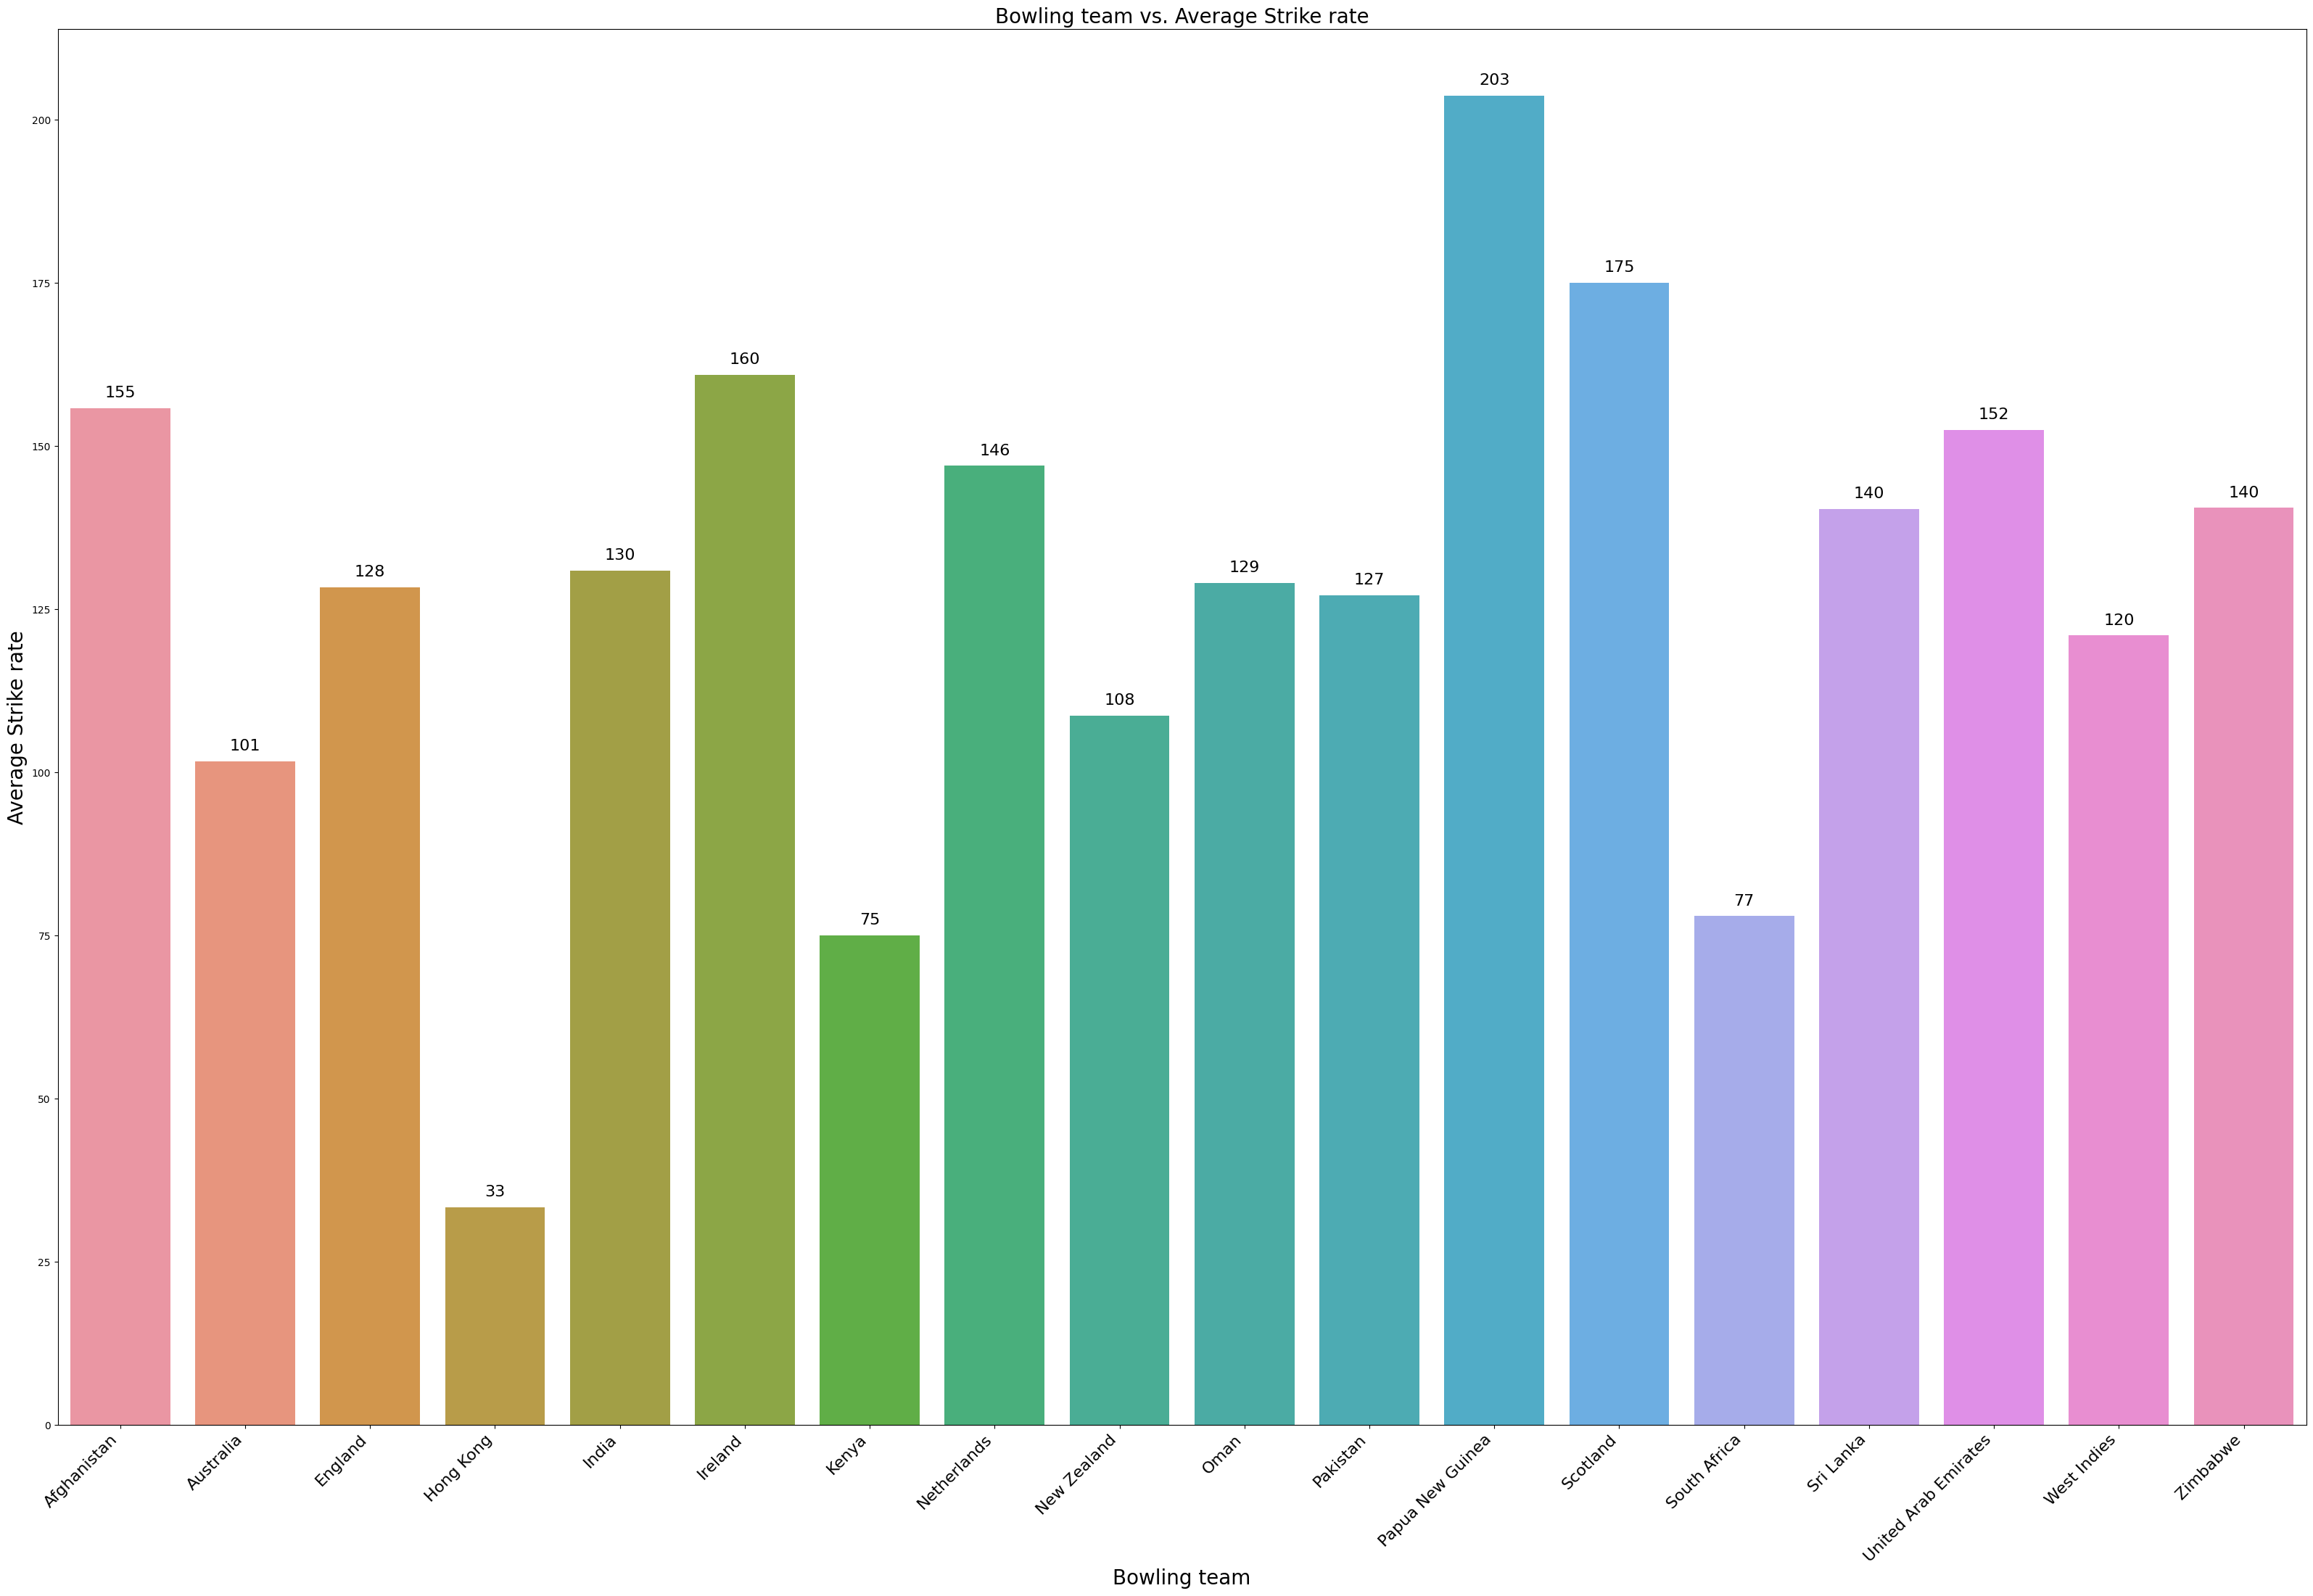

In [41]:
# create new dataframe with bowling_team and their corresponding average strike rate
strike_rate_data = grouped_data.groupby('bowling_team')['strike_rate'].mean().reset_index()

# set bowling_team as index of the dataframe
strike_rate_data = strike_rate_data.set_index('bowling_team')

#Set figure size
plt.figure(figsize=(40, 25))

# plot the data
ax = sns.barplot(x=strike_rate_data.index, y='strike_rate', data=strike_rate_data, errorbar=None)
plt.title('Bowling team vs. Average Strike rate', fontsize=20)
plt.xlabel('Bowling team', fontsize=20)
plt.ylabel('Average Strike rate', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)

# Add labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=16, padding=8, labels=[f"{int(j.get_height())}" for j in i])

plt.show()